In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
# Define a function to calculate descriptive statistics
def calculate_descriptive_stats(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]

    return {
        'Type': str(feature.dtype),
        'Range of Values': feature.max() - feature.min(),
        'Min': feature.min(),
        'Max': feature.max(),
        'Mean': feature.mean(),
        'Mode': feature.mode().iloc[0],  # Assuming a single mode
        'Median': feature.median(),
        'Outlier': outliers.tolist(),
    }

# Create an empty DataFrame to store the results
stats_df = pd.DataFrame(columns=['Feature', 'Type', 'Range of Values', 'Min', 'Max', 'Mean', 'Mode', 'Median', 'Outlier'])

# Iterate through each column in the dataset
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate descriptive statistics for numeric columns
        stats = calculate_descriptive_stats(df[column])
        stats_df.loc[len(stats_df)] = [column, *stats.values()]

    elif isinstance(df[column].dtype, pd.CategoricalDtype):
        # For categorical columns, only calculate mode and type
        stats_df.loc[len(stats_df)] = [column, None, None, mode_value, None, None, None, None, str(df[column].dtype)]

# Display the resulting table
stats_df

,Feature,Type,Range of Values,Min,Max,Mean,Mode,Median,Outlier
0,Age,int64,72.000000,18.000000,90.000000,53.707977,90.000000,54.000000,[]
1,Cholesterol,int64,280.000000,120.000000,400.000000,259.877211,235.000000,259.000000,[]
2,Heart Rate,int64,70.000000,40.000000,110.000000,75.021682,94.000000,75.000000,[]
3,Diabetes,int64,1.000000,0.000000,1.000000,0.652288,1.000000,1.000000,[]
4,Family History,int64,1.000000,0.000000,1.000000,0.492982,0.000000,0.000000,[]
5,Smoking,int64,1.000000,0.000000,1.000000,0.896839,1.000000,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Obesity,int64,1.000000,0.000000,1.000000,0.501426,1.000000,1.000000,[]
7,Alcohol Consumption,int64,1.000000,0.000000,1.000000,0.598083,1.000000,1.000000,[]
8,Exercise Hours Per Week,float64,19.996267,0.002442,19.998709,10.014284,0.002442,10.069559,[]
9,Previous Heart Problems,int64,1.000000,0.000000,1.000000,0.495835,0.000000,0.000000,[]


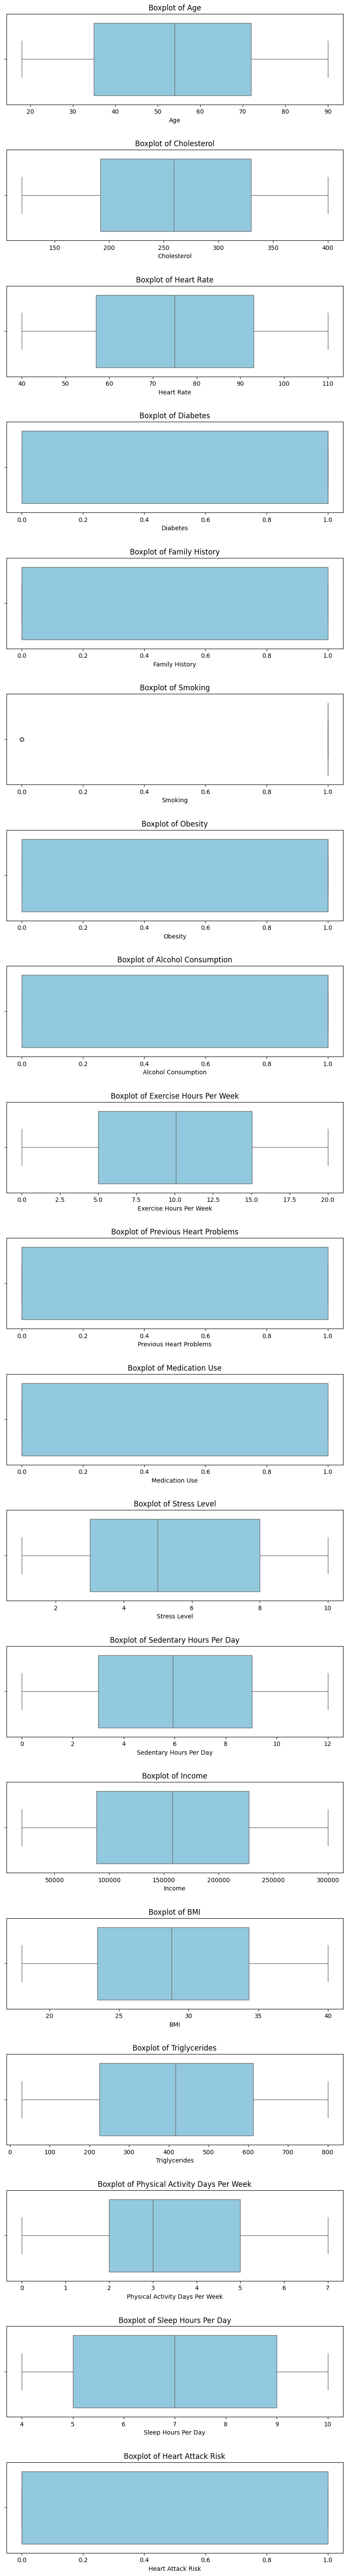

In [5]:
# Create a boxplot for each numeric feature
numeric_columns = df.select_dtypes(include='number').columns

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 4 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Plot boxplots for each numeric feature
for i, column in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], x=df[column], color='skyblue', showfliers=True)
    axes[i].set_title(f'Boxplot of {column}')

# Show the plots
plt.show()

# Suggestions
Based on the provided dataset, there are several potential analyses and predictions you could explore, especially related to predicting heart attack risk. Here are some suggestions:

* Predictive Modeling for Heart Attack Risk:

Utilize machine learning algorithms to build a predictive model for heart attack risk based on various features in the dataset.
Split the dataset into training and testing sets, train the model, and evaluate its performance.
Features like age, cholesterol, blood pressure, family history, smoking, obesity, and others may be significant predictors.
* Feature Importance Analysis:

Conduct a feature importance analysis to identify which features have the most influence on predicting heart attack risk.
This can provide insights into the key factors contributing to heart attacks in the dataset.
Correlation Analysis:

Explore correlations between different features and heart attack risk.
Identify relationships that might be indicative of increased or decreased risk.
* Demographic Analysis:

Analyze the distribution of heart attack risk across demographic factors like age, gender, and country.
Identify groups that may be at higher or lower risk.
* Lifestyle and Health Habits:

Investigate the impact of lifestyle factors such as smoking, alcohol consumption, exercise, and diet on heart attack risk.
Provide recommendations for healthier lifestyle choices based on the analysis.
* Geographical Analysis:

Explore variations in heart attack risk across different countries and continents.
Identify potential regional patterns and risk factors.
* Clustering Analysis:

Use clustering algorithms to group patients based on similarities in features.
Analyze whether certain clusters exhibit a higher or lower risk of heart attack.
* Time Series Analysis:

If there's a temporal component in your dataset, explore trends in heart attack risk over time.
Identify any patterns or anomalies that might be relevant for prediction.
* Sensitivity Analysis:

Assess the sensitivity of the predictive model to changes in input parameters.
Understand how changes in certain features impact the model's predictions.
* Risk Communication:

Develop clear visualizations and communication strategies to convey the risk of heart attack based on different factors.
Provide actionable insights for individuals to reduce their risk.
Remember, before conducting any analysis, it's essential to thoroughly understand the dataset, handle missing values appropriately, and validate the results. Additionally, ethical considerations and privacy should be taken into account, especially when dealing with health-related data.
